In [19]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from ae.utils import set_seed
from ae.dataset import HiddenManifold, load_mnist
from ae.model import AutoEncoder
from ae.trainer import Trainer
from ae.evaluation import Eval
import os
import json

# no scientific notation
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

# set seed for reproducibility
set_seed(42)

In [2]:
# load mnist dataset
dataset, dataset_metadata = load_mnist(log_to_wandb=False)
P = 50000
dataset = dataset[:P]
N = dataset[0].shape[-1]
log_images = True
B = 30
train_test_split = 0.8
threshold = int(len(dataset) * train_test_split)
train_loader = DataLoader(dataset[:threshold], batch_size=32)
test_loader = DataLoader(dataset[threshold:], batch_size=32)

len(test_loader), len(train_loader)

(313, 1250)

In [3]:
model = AutoEncoder(input_dim=N, hidden_layers=[B], activation="ReLU")
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = torch.nn.MSELoss()
scheduler = None
device = "cpu"
epochs = 20

In [4]:
model

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=784, bias=True)
  )
)

In [5]:
for name, param in model.named_parameters():
    print(name, param.shape)

encoder.0.weight torch.Size([30, 784])
encoder.0.bias torch.Size([30])
decoder.0.weight torch.Size([784, 30])
decoder.0.bias torch.Size([784])


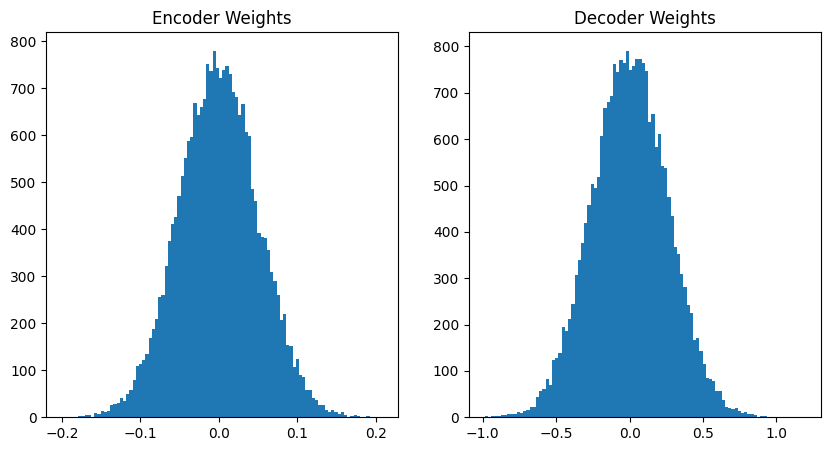

In [12]:
# plot weight histogram of encoder and decoder
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(model.encoder[0].weight.detach().numpy().flatten(), bins=100)
ax[0].set_title("Encoder Weights")
ax[1].hist(model.decoder[0].weight.detach().numpy().flatten(), bins=100)
ax[1].set_title("Decoder Weights")
plt.show()

Loss: 4.482997894287109


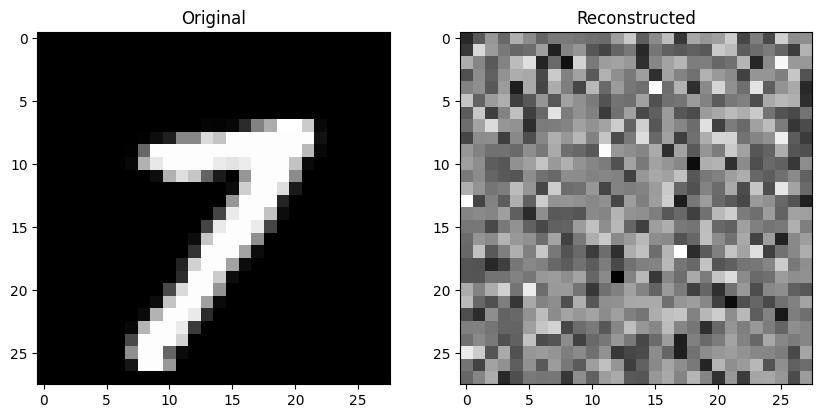

In [16]:
# do inference on one digit, plot the original and reconstructed image, and print the loss
model.eval()
digit = next(iter(test_loader))[0]
reconstructed = model(digit)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(digit.detach().numpy().reshape(28, 28), cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(reconstructed.detach().numpy().reshape(28, 28), cmap="gray")
ax[1].set_title("Reconstructed")
print("Loss: {}".format(criterion(reconstructed, digit).item()))
plt.show()

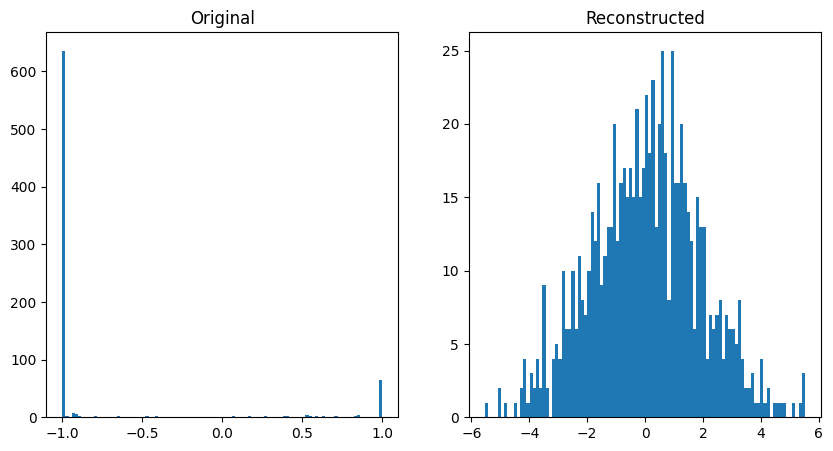

In [21]:
# show histogram of original and reconstructed image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(digit.detach().numpy().flatten(), bins=100)
ax[0].set_title("Original")
ax[1].hist(reconstructed.detach().numpy().flatten(), bins=100)
ax[1].set_title("Reconstructed")
plt.show()